In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/home/irfan/.local/share/virtualenvs/ds_code-Sb-xMZMk/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Ken Jee's YouTube Channel

# Summary code 
In this notebook I very lightly explore the data. The goal of this is to get you familiar with the basic features in the data so that you can start exploring it on your own. 

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read in data 
df_vid = pd.read_csv('Aggregated_Metrics_By_Video.csv')
df_vid_subs = pd.read_csv('Aggregated_Metrics_By_Country_And_Subscriber_Status.csv.zip')
df_ts = pd.read_csv('Video_Performance_Over_Time.csv.zip')
df_comments = pd.read_csv('All_Comments_Final.csv.zip')

In [5]:
#look at columns for each dataframe 
print(df_vid.columns)
print(df_vid_subs.columns)
print(df_ts.columns)
print(df_comments.columns)


Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)'],
      dtype='object')
Index(['Video Title', 'External Video ID', 'Video Length', 'Thumbnail link',
       'Country Code', 'Is Subscribed', 'Views', 'Video Likes Added',
       'Video Dislikes Added', 'Video Likes Removed',
       'User Subscriptions Added', 'User Subscriptions Removed',
       'Average View Percentage', 'Average Watch Time', 'User Comments Added'],
      dtype='object')
Index(['Date', 'Video Title', 'External Video ID', 'Video Length',
       'Thumbnail link', 'Views', 'Video Likes Added', 'Video Dislikes Added',
       'Video Likes Removed', 'User Sub

### 1st row contains some aggregates, that may be confusing for now

In [6]:
df_vid = df_vid[1:]
df_vid.head(2)

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72


In [7]:
df_vid.dtypes

Video                                    object
Video title                              object
Video pub­lish time                      object
Com­ments ad­ded                          int64
Shares                                    int64
Dis­likes                                 int64
Likes                                     int64
Sub­scribers lost                         int64
Sub­scribers gained                       int64
RPM (USD)                               float64
CPM (USD)                               float64
Av­er­age per­cent­age viewed (%)       float64
Av­er­age view dur­a­tion                object
Views                                     int64
Watch time (hours)                      float64
Sub­scribers                              int64
Your es­tim­ated rev­en­ue (USD)        float64
Im­pres­sions                             int64
Im­pres­sions click-through rate (%)    float64
dtype: object

### Let's rename columns to some short and suitable names

In [8]:
df_vid = df_vid.rename(columns={'Video':'id', 'Video title':'title', 'Video pub­lish time':'date', 
                        'Com­ments ad­ded':'comments','Shares':'shares', 'Dis­likes':'dislikes',
                        'Likes':'likes','Sub­scribers lost':'lost_subs',
                        'Sub­scribers gained':'gained_subs','RPM (USD)':'rpm', 'CPM (USD)':'cpm',
                        'Av­er­age per­cent­age viewed (%)':'average_view_pct',
                        'Av­er­age view dur­a­tion':'average_view_time','Views':'views',
                        'Watch time (hours)':'watch_time','Sub­scribers':'subscribers',
                        'Your es­tim­ated rev­en­ue (USD)':'estimated_revenue','Im­pres­sions':'impressions',
                        'Im­pres­sions click-through rate (%)':'CTRate'})

In [9]:
videos = df_vid
videos.columns

Index(['id', 'title', 'date', 'comments', 'shares', 'dislikes', 'likes',
       'lost_subs', 'gained_subs', 'rpm', 'cpm', 'average_view_pct',
       'average_view_time', 'views', 'watch_time', 'subscribers',
       'estimated_revenue', 'impressions', 'CTRate'],
      dtype='object')

# Problem Set / Questions to be Answered

- What topics get the most viewership?
- What do are people asking for in the comments?
- What impacts watch time and click through rate?
- Can we predict if a title will be clickable? 
- What thumbnails are most appealing (thumbnail data available in df_agg)
- What is different about my "viral" videos and normal videos
- Who is the core audience of my channel?

### What 'Aggregated_Metrics_By_Videos.csv' data set tells?

In [10]:
videos.head(2)

,id,title,date,comments,shares,dislikes,likes,lost_subs,gained_subs,rpm,cpm,average_view_pct,average_view_time,views,watch_time,subscribers,estimated_revenue,impressions,CTRate
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72


the data set tells for every video:
- comments it gained
- how much it was shared
- how much it was liked and disliked
- subscribers
- view stats
- click-through rate

How many videos?

In [11]:
videos.shape

(223, 19)

## Q1- What topics get the most viewership?

# Making Observations

the data set contains some vids with -ve subscribers, lets filter them out

In [12]:
sub_videos = videos[videos['subscribers']>0]
sub_videos.shape

(216, 19)

In [13]:
(216/223)*100

96.8609865470852

96.9% videos did gain subscribers.

In [14]:
sub_videos = sub_videos.sort_values(by='views')
sub_videos.describe()

,comments,shares,dislikes,likes,lost_subs,gained_subs,rpm,cpm,average_view_pct,views,watch_time,subscribers,estimated_revenue,impressions,CTRate
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,215.000000,216.000000,2.160000e+02,216.000000,216.000000,216.000000,2.160000e+02,216.000000
mean,61.601852,183.240741,17.967593,1038.115741,13.333333,606.129630,4.503509,11.533986,34.350046,2.569858e+04,1466.255796,592.796296,134.410125,4.639384e+05,3.095324
std,87.874322,744.525732,70.651216,3631.886949,33.720879,3353.954989,1.763560,3.321150,14.375554,9.096247e+04,4876.113005,3321.804153,562.989055,1.893355e+06,1.567778
min,2.000000,0.000000,0.000000,18.000000,0.000000,2.000000,0.000000,5.439000,7.320000,4.550000e+02,6.308900,1.000000,0.000000,1.863500e+04,0.490000
25%,19.000000,22.000000,1.000000,168.000000,2.000000,29.000000,3.320750,9.481000,23.975000,4.044500e+03,187.472575,22.750000,13.063250,9.947100e+04,1.965000
50%,37.000000,48.000000,4.000000,358.500000,7.000000,76.500000,4.348500,11.302000,35.500000,8.671500e+03,420.520800,66.000000,34.363000,1.542310e+05,2.905000
75%,65.250000,115.500000,11.000000,722.500000,14.000000,260.500000,5.427500,12.974500,43.462500,1.852425e+04,1157.035775,243.500000,97.246500,3.005855e+05,3.992500
max,907.000000,9583.000000,942.000000,46903.000000,451.000000,46904.000000,10.387000,37.786000,75.620000,1.253559e+06,65850.704200,46453.000000,7959.533000,2.649880e+07,8.620000


75th percentile is 43.5 in avg view %age, 1.852425e+04 in views, 1157.035775 in watch_time

In [15]:
sub_videos[sub_videos['views']>18524].shape

(54, 19)

out of 223 videos 59 lie in 75th percentile, and 53 had more than 18.5k views

In [16]:
sub_videos[sub_videos['views']>18524]['likes'].max()

46903

In [17]:
from collections import defaultdict

In [18]:
words = defaultdict(int)
 
# memoizing count
for sub in sub_videos[sub_videos['views']>18000]['title']:
    for wrd in sub.split():
        words[wrd] += 1
 
# getting max frequency
for i in words:
    if words[i] >10:
        print(i, words[i])

to 11
a 14
Data 58
Science 43
- 11
How 17
I 13


### Conclusion1;

**most common words in the titles of most viewed videos are *Data and Science***

Let's see what their release dates tell?

In [19]:
sub_videos['date'] = pd.to_datetime(sub_videos['date'])

In [20]:
sub_videos[sub_videos['views']>18000]['date'].min()

Timestamp('2018-11-14 00:00:00')

In [21]:
sub_videos[sub_videos['views']>18000]['date'].max()

Timestamp('2021-12-27 00:00:00')

In [22]:
DS_vids = sub_videos[sub_videos['title'].str.contains('Data Science')]
DS_vids['title'].count()

143

From November 2018 to December 2021 there are 143 videos on Data Science. About 64% videos are on Data Science, in total data set.

In [33]:
DS_vids[DS_vids['views']>18000]['title'].count()

44

out of 143 Data Science videos, 44 had more than 18000 views.

Let's see what is the date range for these videos

In [34]:
DS_vids[DS_vids['views']>18000]['date'].min()

Timestamp('2018-11-14 00:00:00')

In [35]:
DS_vids_copy = DS_vids.copy()
DS_vids_copy['date'] = DS_vids_copy['date'].dt.to_period('Q')
DS_vids_copy = DS_vids_copy.groupby('date')

In [36]:
DS_vids_copy.count()

,id,title,comments,shares,dislikes,likes,lost_subs,gained_subs,rpm,cpm,average_view_pct,average_view_time,views,watch_time,subscribers,estimated_revenue,impressions,CTRate
date,,,,,,,,,,,,,,,,,,
2018Q4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2019Q1,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2019Q2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2019Q3,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
2019Q4,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
2020Q1,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
2020Q2,27,27,27,27,27,27,27,27,27,26,27,27,27,27,27,27,27,27
2020Q3,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
2020Q4,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


most Data Science videos were released in year 2020

In [37]:
DS_vids[(DS_vids['date']>('2019-12-31'))  & (DS_vids['date']<('2021-01-01')) & (DS_vids['views']==482)]

,id,title,date,comments,shares,dislikes,likes,lost_subs,gained_subs,rpm,cpm,average_view_pct,average_view_time,views,watch_time,subscribers,estimated_revenue,impressions,CTRate
213,foggudmDDvY,Data Science in Golf: PGA Merchandise Show 2020,2020-01-31,6,5,0,18,0,2,3.529,12.105,38.65,0:03:31,482,28.3566,2,1.701,41477,0.69


In [38]:
DS_vids[(DS_vids['date']>('2019-12-31'))  & (DS_vids['date']<('2021-01-01')) & (DS_vids['views']==1253559)]

,id,title,date,comments,shares,dislikes,likes,lost_subs,gained_subs,rpm,cpm,average_view_pct,average_view_time,views,watch_time,subscribers,estimated_revenue,impressions,CTRate
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,2020-05-08,907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14


What about videos without Data Science?

In [40]:
NDS_vids = sub_videos[~sub_videos['title'].str.contains('Data Science')]
NDS_vids['title'].count()

73

In [41]:
NDS_vids[NDS_vids['views']>=18000]['title'].count()

13

## Aggregated data 
**Notes**
- Few videos skew number of likes, views, subscribers, etc. (what made these videos stand apart?)
- What other variables like view / like ratio can we engineer to evaluate performance 

In [6]:
df_agg.describe()

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,222.000000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,2.240000e+02,224.000000
mean,126.750000,353.924107,34.839286,2008.919643,217.620536,1608.084821,4.442040,11.442779,34.087277,4.971645e+04,2835.711522,1390.464286,259.537433,9.013573e+05,3.084152
std,948.732371,2736.321694,268.668317,15387.274015,3058.766918,15628.834115,1.789148,3.334781,15.118746,3.810302e+05,21662.566897,12647.246927,2011.119492,6.967916e+06,1.670448
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,6.000000e+01,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,18.000000,19.000000,1.000000,163.500000,2.000000,27.000000,3.220750,9.379500,23.602500,3.940000e+03,177.037125,19.750000,12.208250,9.947100e+04,1.925000
50%,37.000000,46.500000,4.000000,342.500000,7.000000,70.000000,4.334500,11.169500,35.120000,8.347500e+03,397.852200,62.500000,32.595500,1.541925e+05,2.895000
75%,66.250000,114.250000,11.000000,716.000000,14.000000,245.500000,5.372250,12.901000,43.462500,1.836875e+04,1145.621400,230.500000,96.814750,2.894885e+05,3.975000
max,14197.000000,39640.000000,3902.000000,225021.000000,45790.000000,229241.000000,10.387000,37.786000,76.600000,5.568487e+06,317602.353600,183451.000000,29068.652000,1.009541e+08,11.510000


<AxesSubplot:>

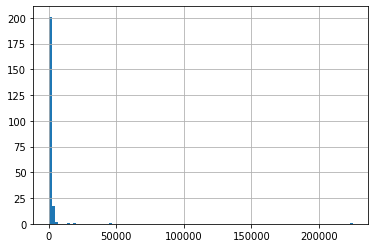

In [7]:
#likes distribution
df_agg.Likes.hist(bins = 100)

<AxesSubplot:>

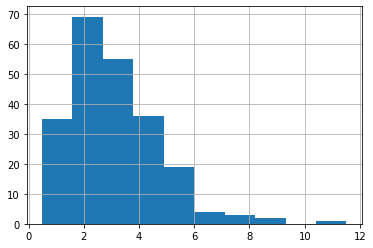

In [10]:
df_agg['Im­pres­sions click-through rate (%)'].hist()

     view_like_ratio                                        Video title
138        67.036437  Predicting Crypto-Currency Price Using RNN lST...
75         66.985507          Should You Get A Masters in Data Science?
151        61.850575  Reviewing Your Data Science Projects - Episode...
223        60.000000                     ProjectDemoCSC478_UFCFightData
21         53.008940  Scrape Twitter Data in Python with Twitterscra...
..               ...                                                ...
195        12.813953     Can You Learn Data Science Without a Computer?
220        12.454545  Most Data Science Hopefuls Overlook This Impor...
58         11.276620                 The 5 Pillars of Success I Live By
76         10.857143  The YouTube Algorithm EXPLAINED! (Tips from a ...
79          8.807229  The Secret Data Scientists Don't Want You to Know

[224 rows x 2 columns]


<AxesSubplot:>

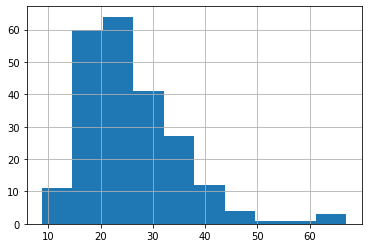

In [11]:
#basic feature engieering example
df_agg['view_like_ratio'] = df_agg.Views / df_agg.Likes
print(df_agg[['view_like_ratio','Video title']].sort_values('view_like_ratio',ascending=False))
df_agg.view_like_ratio.hist()

## Aggregated data by country & subscriber

In [12]:
#views by country 
#looks like these numbers are daily averages, still useful?
pd.pivot_table(df_agg_sub, index = 'Country Code', values = 'Views').sort_values('Views',ascending = False)

,Views
Country Code,
US,3043.707865
IN,2596.651685
GB,537.476404
CA,500.840090
DE,386.887640
...,...
BL,1.000000
PM,1.000000
ST,0.833333


In [13]:
#subscribed to not subscribed values 
pd.pivot_table(df_agg_sub, index = 'Is Subscribed', values = 'Views').sort_values('Views',ascending = False)

,Views
Is Subscribed,
False,139.773296
True,58.607400


## Time Series Data

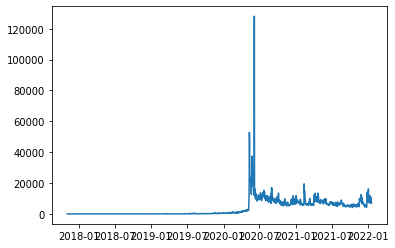

In [14]:
#converting to date time 
df_ts['Date'] = pd.to_datetime(df_ts['Date'])
#getting views per day 
views_per_day = pd.pivot_table(df_ts.loc[:,['Views','Date']],index = 'Date', values = 'Views', aggfunc = 'sum').reset_index()
# graphing views per day
plt.plot(views_per_day.Date,views_per_day.Views)

## Comment Data

In [15]:
#top commented videos
pd.pivot_table(df_comments, index = 'VidId', values = 'Comment_ID', aggfunc = 'count').sort_values('Comment_ID', ascending = False)

#could you join this back to the other dataset? 

,Comment_ID
VidId,
4OZip0cgOho,797
Ip50cXvpWY4,262
Q9FjwzKFPuM,224
41Clrh6nv1s,219
8igH8qZafpo,205
...,...
k-gin1qfzi0,3
j-Z-je6K4Yg,3
Yr5T3T4tq-g,3


## Your Turn! 
### I started you off with the bare minimum, it's your turn to add your insights to the analysis. Excited to see what you come up with!!
I'm constantly thinking about questions like:
- What topics get the most viewership?
- What do are people asking for in the comments?
- What impacts watch time and click through rate?
- Can we predict if a title will be clickable? 
- What thumbnails are most appealing (thumbnail data available in df_agg)
- What is different about my "viral" videos and normal videos
- Who is the core audience of my channel?

### Some cool projects that could be done
- Chatbot to answer common questions 
- Thumbnail feature extraction (taking characteristics from the thumbnails and analyzing if those predict ctr) - Could use something like cloudvision to extract features: https://cloud.google.com/vision/docs/drag-and-drop 